# HW 4: Logistic Regression

## Importing libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
# Load Iris dataset and find out what is in this dataset
iris = datasets.load_iris()
for key, value in iris.items():
    print(key)

data
target
target_names
DESCR
feature_names
filename


In [0]:
#what's in each of 
# target_names
# DESCR
# target
# feature_names
# data
# DESCR and target are shown below. 
# Continue to work out the rest by appending more cells below.

In [4]:
#Let's see the description of this dataset?
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
#What's in target?
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
#How many 0s, 1s, and 2s are in target?
iris_target = pd.DataFrame({'target' : iris['target']})

In [7]:
iris_target['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

## Using Logistic Regression for binary class classification

In [0]:
# Let's focus on data with only two classes ( the first 100 entries)
data_100 = iris.data[:100,:]
target_100 = iris.target[:100]

In [9]:
#check the size of data_100
data_100.shape

(100, 4)

## Standardize Features

In [10]:
#What's the mean and standard deviation of data_100 and target_100
print('mean of data_100 = ', data_100.mean())
print('standard deviation of data_100 = ', data_100.std())
print('mean of target_100 = ', target_100.mean())
print('standard deviation of data_100 = ', target_100.std())


mean of data_100 =  3.05425
standard deviation of data_100 =  1.8745617987945877
mean of target_100 =  0.5
standard deviation of data_100 =  0.5


In [11]:
print('mean of sepal length (cm) = ', round(data_100[:,0].mean(), 3))
print('standard deviation of sepal length (cm) = ', round(data_100[:,0].std(),3))
print('mean of sepal width (cm) = ', round(data_100[:,1].mean(),3))
print('standard deviation of sepal width (cm) = ', round(data_100[:,1].std(),3))
print('mean of petal length (cm) = ', round(data_100[:,2].mean(),3))
print('standard deviation of petal length (cm) = ', round(data_100[:,2].std(),3))
print('mean of petal width (cm) = ', round(data_100[:,3].mean(),3))
print('standard deviation of petal width (cm) = ', round(data_100[:,3].std(),3))


mean of sepal length (cm) =  5.471
standard deviation of sepal length (cm) =  0.638
mean of sepal width (cm) =  3.099
standard deviation of sepal width (cm) =  0.476
mean of petal length (cm) =  2.861
standard deviation of petal length (cm) =  1.442
mean of petal width (cm) =  0.786
standard deviation of petal width (cm) =  0.562


In [0]:
scaler = StandardScaler()
# Transform the feature
data_100_standardized = scaler.fit_transform(data_100)

In [13]:
#what's the mean and standard deviation of the standardized data_100
print('mean of data_100_standardized = ', data_100_standardized.mean())
print('standard deviation of data_100_standardized = ', data_100_standardized.std())

mean of data_100_standardized =  -1.1723955140041654e-15
standard deviation of data_100_standardized =  0.9999999999999998


## Create Logistic Regression

In [14]:
#Let's create a dataframe table to store all the features
features = pd.DataFrame(data_100_standardized, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [0]:
#Create another dataframe to store the target
target = pd.DataFrame(target_100, columns=['target'])

In [16]:
# let's combine these two 'tables' into one dataframe
df = pd.concat([features,target], axis=1)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,0.515285,1.891509,-1.151647,-1.042111,0
64,0.202042,-0.417770,0.512382,0.914070,1
84,-0.111201,-0.207835,1.136393,1.269739,1
72,1.298393,-1.257507,1.413731,1.269739,1
76,2.081500,-0.627704,1.344397,1.091905,1


In [17]:
#find out which is most correlated to the target?
df.corr().abs()['target'].sort_values(ascending=False)[1:]

petal length (cm)    0.969990
petal width (cm)     0.960307
sepal length (cm)    0.728290
sepal width (cm)     0.690684
Name: target, dtype: float64

In [0]:
# Create logistic regression object
LogReg = LogisticRegression()

## Train Logistic Regression

In [0]:
#Create (X,y) data pair ready for fitting the model
X = df[iris.feature_names]
y=df['target']

In [20]:
# Train model using the entire dataset
LogReg.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Add a column predictions to the df dataframe on the predicted values based on X
df['predictions'] = LogReg.predict(X)

In [22]:
#What's the score of using the entire dataset to train our Logistic Regression?
LogReg.score(X,y)

1.0

In [23]:
# probability of each class as validated against X
pred_prob = LogReg.predict_proba(X)
pred_prob_df = pd.DataFrame(pred_prob)
df_predprob_all = pd.concat([df,pred_prob_df],axis=1)
# df_predprob_all.shape
df_predprob_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions,0,1
0,-0.581066,0.841837,-1.012978,-1.042111,0,0,0.989031,0.010969
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0,0.971477,0.028523
2,-1.207552,0.212034,-1.082312,-1.042111,0,0,0.987612,0.012388
3,-1.364174,0.002099,-0.943643,-1.042111,0,0,0.982852,0.017148
4,-0.737687,1.051772,-1.012978,-1.042111,0,0,0.992415,0.007585
5,-0.111201,1.681575,-0.804974,-0.686442,0,0,0.985775,0.014225
6,-1.364174,0.631903,-1.012978,-0.864276,0,0,0.990215,0.009785
7,-0.737687,0.631903,-0.943643,-1.042111,0,0,0.986311,0.013689
8,-1.677417,-0.417770,-1.012978,-1.042111,0,0,0.980490,0.019510
9,-0.894309,0.002099,-0.943643,-1.219946,0,0,0.980950,0.019050


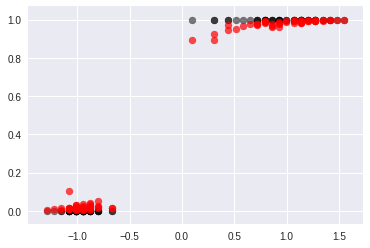

In [24]:
# Plot the predicted probabilities of petal length (cm) against predictions
# plt.scatter(df['petal length (cm)'], glass.household)

# show the probability of each class(row) as validated against X followed by
# scatter plot the petal length (cm) against y (the target)
# scatter plot on the same plot the petal length (cm) against the predicted probabilities in different color, e.g.,red. 

plt.scatter(x= df['petal length (cm)'], y= df['target'], c='black' , alpha=0.5)
plt.scatter(x= df_predprob_all.iloc[:,2], y= df_predprob_all.iloc[:,7], c='red', alpha=0.7)
# plt.xlabel('predictions')
# plt.ylabel('predicted probability')
plt.show()

##  Multi-class classification using Logistic Regression

In [0]:
#Load Iris dataset again
iris = datasets.load_iris()

In [0]:
#Standardize the dataset
scaler2 = StandardScaler()

# Transform the feature
standardized_data = scaler2.fit_transform(iris.data)

In [0]:
#create dataframes for data and target separately
data = pd.DataFrame(standardized_data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])

In [0]:
#Combine data and target into one big dataframe tables
iris_data = pd.concat([data,target],axis=1)

In [29]:
#check how many different values does target have?
iris_data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [0]:
#Create a new copy of Logistic Regression class
LogRegM = LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state=0)

In [0]:
#Define (X,y) to be used for training the model
X=iris_data[iris.feature_names]
y=iris_data['target']

In [32]:
#Fit the model with all the data
#Find out how well it scores
LogRegM.fit(X,y)
scoreM = LogRegM.score(X,y)
scoreM

0.9733333333333334

In [0]:
#Show which ones (rows) the model fail to predict 
iris_data['predicted_values']= LogRegM.predict(X)

In [34]:
diff_predictions_df = iris_data[iris_data['target']!= iris_data['predicted_values']].reset_index().drop(['index'], axis=1)
diff_predictions_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted_values
0,0.068662,0.328414,0.592246,0.790671,1,2
1,1.038005,-0.131979,0.705921,0.659038,1,2
2,0.189830,-0.822570,0.762758,0.527406,1,2
3,0.553333,-0.592373,0.762758,0.395774,2,1


In [0]:
#Show the predict_proba of those (rows) that failed to predict correctly.
#Is the probability of the target class close/not close to that of the predicted class in these cases?

In [36]:
predictProbab_M = LogRegM.predict_proba(diff_predictions_df.iloc[:,:4])
predictProbab_M

array([[0.01201214, 0.44032623, 0.54766162],
       [0.00117927, 0.45787004, 0.54095069],
       [0.00167859, 0.43725132, 0.56107009],
       [0.00198042, 0.58401019, 0.41400939]])

In [37]:

df_predictedProbab = pd.concat([diff_predictions_df,pd.DataFrame(predictProbab_M)], axis = 1)
df_predictedProbab

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predicted_values,0,1,2
0,0.068662,0.328414,0.592246,0.790671,1,2,0.012012,0.440326,0.547662
1,1.038005,-0.131979,0.705921,0.659038,1,2,0.001179,0.457870,0.540951
2,0.189830,-0.822570,0.762758,0.527406,1,2,0.001679,0.437251,0.561070
3,0.553333,-0.592373,0.762758,0.395774,2,1,0.001980,0.584010,0.414009


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_predictedProbab['target'],df_predictedProbab['predicted_values']) # confusion matrix for rows with different target vs predicted_values

array([[0, 3],
       [1, 0]])

###<font color='blue'> According to my observation, The probability of target class are almost 10% close to predicted class. So in real time time that is a vast difference which can result in major errors. eg. in case of handwritten digits on checks.  </font>